
# Project: Investigate The Movie Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

>The Movie Database (TMDB) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

### Question(s) for Analysis
> Which geners are most popular from year to year ? <br>
> What kinds of properties are associated with movies that have high revenues? <br>
> What is the top 10 movies according to revenue ? <br>


> At the begining of our analysis , lets load our required libraries for the analysis.

In [69]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 

> Lets load our dataset , and look at the first 5 rows , to get a good idea of our available data.

In [70]:
# Loading our database in form of DataFrame for analyses 
df = pd.read_csv('tmdb-movies.csv')
# Printing the first 5 rows for data wrangling
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Seems intersting data , and can get our required answers from it .<br>
> Lets get a look at some statistics of our data for better understanding .

In [71]:
# Getting a breif statistics of our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> From this statistics we can get that some value are not acceptable , like revenue for some moveies in zero , which is not acceptable at all. *** Need to clean the unacceptable data in the data clean process *** <br>
> Next lets check if there is any dublicated rows , which may affect our results .

In [72]:
# Investigating for duplicated values 
df.duplicated().sum()

1

> Next lets look for any unacceptable data type , or NAN values , which need our attention.

In [73]:
# Investigating for NAN missing values , which may affect our analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

 

> First of all , lets remove the duplicated rows .

In [74]:
# We have one duplicated row , which needs to be removed
df.drop_duplicates(inplace=True)


> Next , we are going to remove some columns which are not required for our analysis , and removing some columns with too much missing data like 'keywords' and 'tagline'

In [75]:
# In this step we are tring to get ride of our NAN value by analytics or removing it
# starting with homepage coulmn , which have too many missing values , and provide useless data for our analyses
df.drop('homepage',axis=1,inplace=True)
# Next is removing id an imdb_id ,overview,runtime,release_date ,tagline , and keywords  as they are useless in our analyses
df.drop(['id','imdb_id','overview','runtime','release_date','tagline','keywords'],axis=1,inplace=True)


> Then , lets remove the NAN value to get clear dataset

In [76]:
# Removing the rest of NAN values as the rest of it are in string type columns 
df.dropna(inplace=True)

> Next , lets remove unacceptable data , like that for movies have revenue of budget equal to zero !!

In [77]:
# Removing each row says the budget or revenue of the movie equal zero
df = df[df['budget'] !=0]
df = df[df['revenue'] !=0]
# Now we gonna to reset the order of indexes for correct numbering
df.reset_index(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



###  Which geners are most popular from year to year? <br>
> Starting to extract our genres data and years from our dataset in an easy form for our analyses <br>
> Getting the most repeated genre for each year in our data set <br>

> First of all , lets get a data set containing each unique year and genre in our data set . <br>

In [78]:
# We want to create a list with unique years and genres in each year.
year_set = set()
genres_set = set()
genres_years = df[['genres','release_year']]
# Now lets start filling our year_set variable with unique years in our dataset.
production_year = df['release_year']
production_year.drop_duplicates(inplace=True)
for year in production_year:
    if year not in year_set:
        year_set.add(year)
# Now we got a dictionary year_set conatins unique years value in our dataset.
# It is time to get our unique genres values.
for year in year_set:
    genres_temp = genres_years[genres_years['release_year'] == year]
    genres_temp = genres_years['genres'].values
    for row in genres_temp:
        genres_row = row.split("|")
        for gen in genres_row:
            if gen not in genres_set:
                genres_set.add(gen)


> Then, lets form a data fram contains the number of each unique genre movies per year

In [79]:
# Then we are going to counts the number of each genre
gerne_count_per_year = pd.DataFrame(index=year_set , columns=genres_set)
gerne_count_per_year[:] = 0
for year in year_set:
    genres_dic = {}
    genres_temp = genres_years[genres_years['release_year'] == year]
    genres_temp = genres_temp['genres'].values
    for row in genres_temp:
        genres_row = row.split("|")
        for gen in genres_row:
            if gen not in genres_dic:
                genres_dic[gen] = 1
            else:
                genres_dic[gen] =  genres_dic[gen] + 1
            
    tra = pd.DataFrame(genres_dic,index= [year])
    gerne_count_per_year.loc[year,tra.columns] = gerne_count_per_year.loc[year, tra.columns] + tra.loc[year]

> then ,Lets plot our results , but first lets define a function for ease of using our visulization functions <br>
> next we are going to define a function to set x label , y label , and the graphe title in a sample way

In [80]:
def xyt(a,b,x):
    ax.set( xlabel= a , ylabel= b , title = x)
    return 

> Now we got the data needed  to answer our first question <br>
> Next we are going to make a histogram showing the maximum movie genre for each year in our dataset

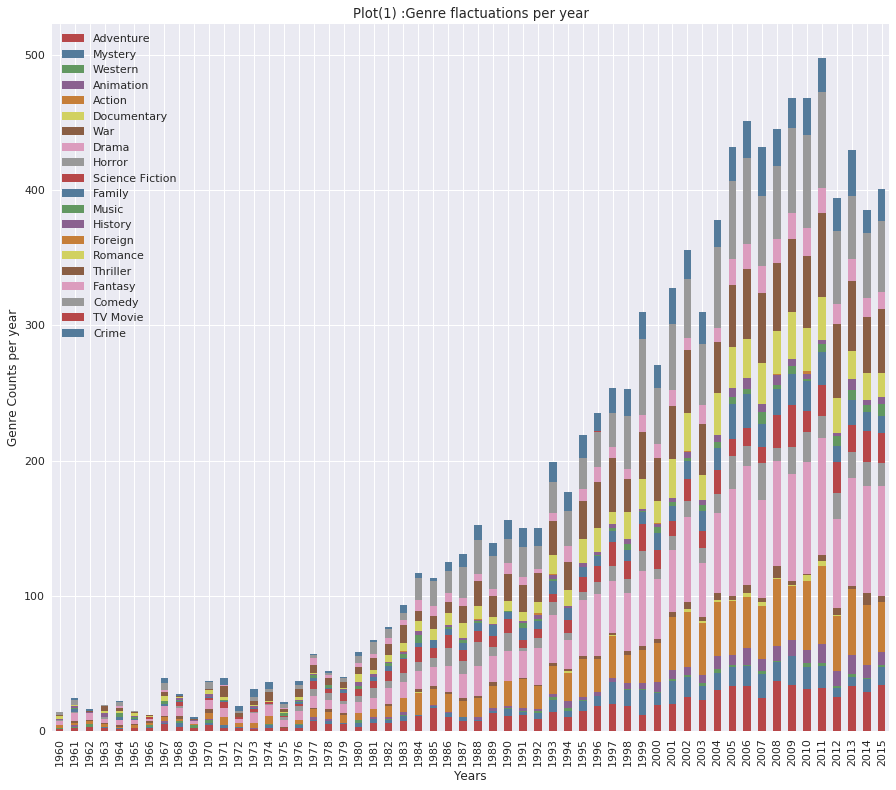

In [81]:
max_genre_per_year = pd.DataFrame([gerne_count_per_year.idxmax(axis=1).values,gerne_count_per_year.max(axis=1).values],columns= gerne_count_per_year.index ,index=['Genre','Count'] )

sns.set(rc={'figure.figsize':(15,13)}, font_scale=1.1)
sns.set_palette("Set1", len(genres_set), .55)
ax = gerne_count_per_year.plot.bar(stacked=True)
xyt('Years' ,'Genre Counts per year' ,'Plot(1) :Genre flactuations per year');

#plt.hist(x=x_years , y=y_counts)


> from plot (1) we can see that most of the production each year is drama , and the least production is for western genre
> lets take 2015 and see the distribution of genre in it for example

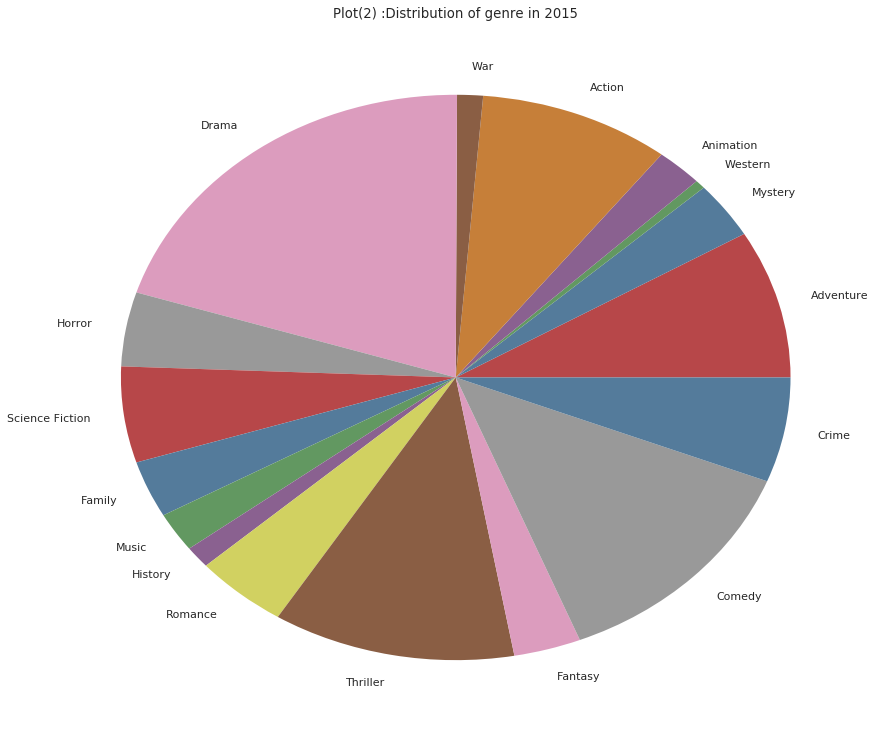

In [82]:
sns.set(rc={'figure.figsize':(15,13)}, font_scale=1.1)
sns.set_palette("Set1", len(genres_set), .55)
ax = gerne_count_per_year.loc[int('2015')].plot.pie(stacked=True)
xyt(' ' ,' ' ,'Plot(2) :Distribution of genre in 2015');


> As we get before , drama movie take the most genre production per year in 2015 , and western genre is the least genre in the movies industry.

###  What kinds of properties are associated with movies that have high revenues? <br>
> Now we are going to compare the revenue with the movie genre <br>
> Lets make a data frame contains the revenue for each genre for each year , to get a better understanding of the relation between the genre and the revenue .

In [83]:
# First lets get the total revenue for each  year for each genre
genres_years_revenue = df[['genres','release_year','revenue_adj']]
revnue_aux = pd.DataFrame(columns=genres_set , index =year_set).fillna(0)
for year in year_set:
    genres_temp = genres_years_revenue[genres_years['release_year'] == year].reset_index(drop=True)
    for gen in genres_set:
        aux = genres_temp[genres_temp['genres'].str.contains(gen)]
        revnue_aux.loc[int(year),str(gen)] = revnue_aux.loc[int(year),str(gen)] + sum(aux['revenue_adj'].values)


> Next , lets make a histograme about our data

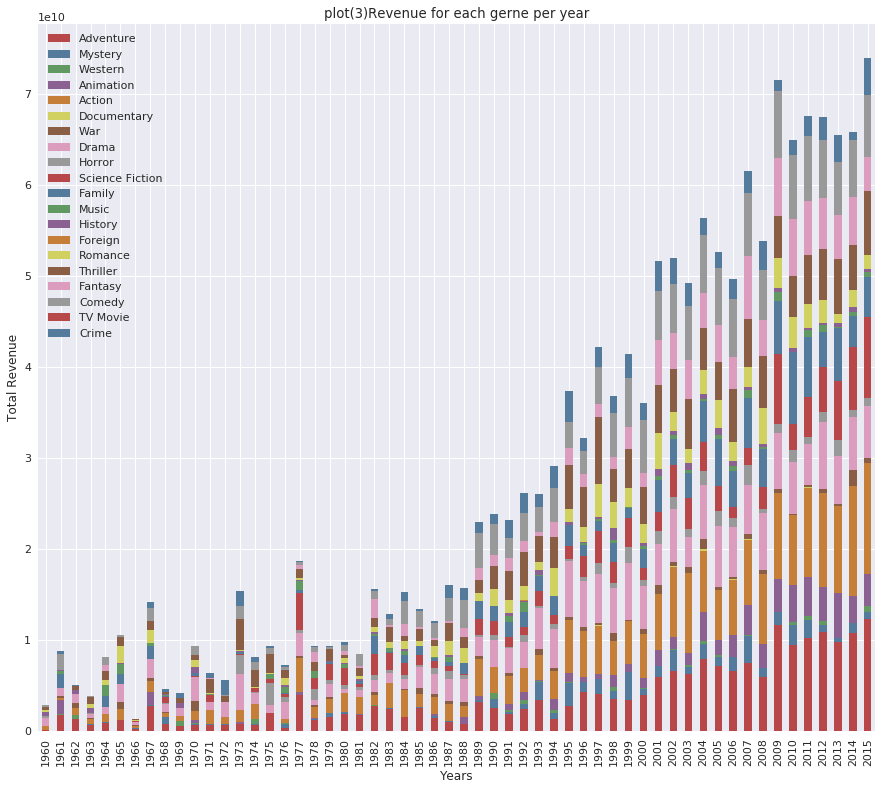

In [84]:
# Secondly we will visulize our results on the relation between gerne and revenue
sns.set(rc={'figure.figsize':(15,13)}, font_scale=1.1)
sns.set_palette("Set1", len(genres_set), .55)
ax = revnue_aux.plot.bar(stacked=True)
xyt('Years' , 'Total Revenue' ,'plot(3)Revenue for each gerne per year');


> From our histogram , we can see that adventure and action genres , have the top revenue in our dataset.
> Lets get the revenue for each genre in 2015 for a close look .

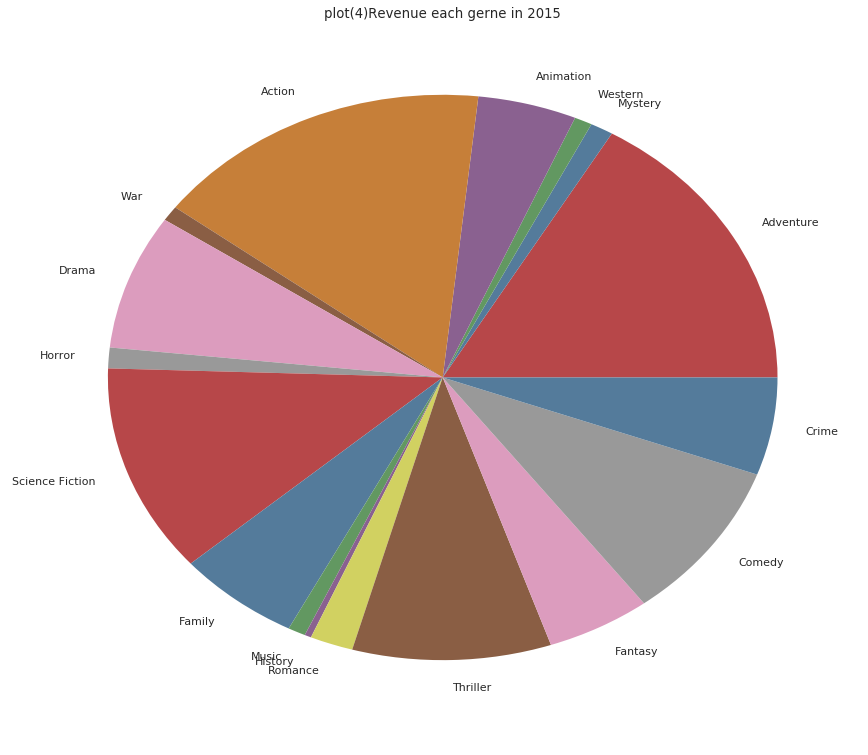

In [85]:
sns.set(rc={'figure.figsize':(15,13)}, font_scale=1.1)
sns.set_palette("Set1", len(genres_set), .55)
ax = revnue_aux.loc[int('2015')].plot.pie(stacked=True)
xyt(' ' , ' ' ,'plot(4)Revenue each gerne in 2015');

### What is the top 10 movies according to revenue ?
> In this part of our report , we are going to get the top ten movies according to its revenue . <br>
> Lets start by arranging our data by its revenue , and slice it to get revenue and original titile only .

In [86]:
# first lets get a dataframe contains the top 10 movies according to revenue
arrange_by_revenue = df.sort_values(by=['revenue_adj'] , ascending=False)
top_10_movies = arrange_by_revenue[['revenue_adj','original_title']].reset_index(drop=True).iloc[0:10,:]

> Next , lets make our histogram for the top ten mocies according to its genre . 

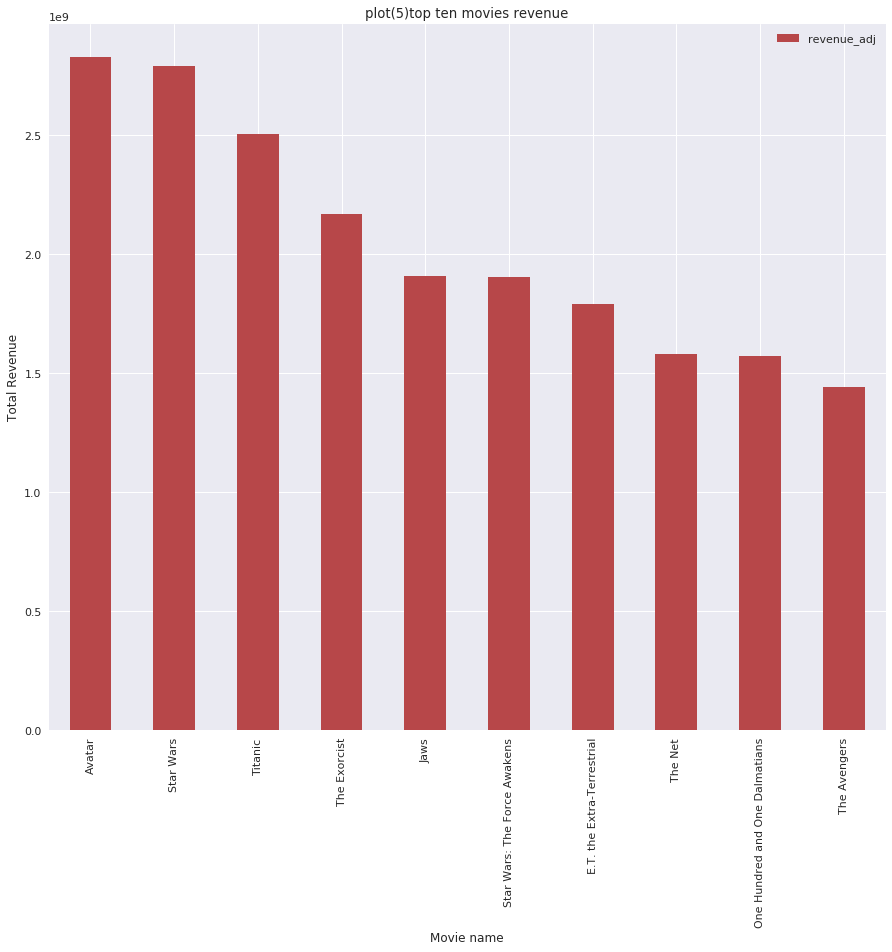

In [87]:
# then lets visulize our results for better comparison 
sns.set(rc={'figure.figsize':(15,13)}, font_scale=1.1)
sns.set_palette("Set1", len(top_10_movies['original_title']), .55)
ax = top_10_movies.plot.bar(stacked=True)
ax.set( xlabel= 'Movie name' , ylabel= 'Total Revenue' , title = 'plot(5)top ten movies revenue')
plt.xticks(np.arange(0,len(top_10_movies['original_title'])), top_10_movies['original_title']);


> We can see that all of the mocies in the top ten movies per revenue have adventure genre , which meets our previous conclusion .

<a id='conclusions'></a>
## Conclusions
### Limitations
> this dataset is rich of information from 1960 to 2015. It contains many NAN values , some duplicated values,and some illogical values ,which have been filterd to continue our analysis , and we could get the following summary for our analyses main questions . <br>
#### Which geners are most popular from year to year ?<br>
> We went throught this question , and got a histogram chart (plot(1)) declearing the count of each genre per each year in our dataset,and we can see that most of the production each year is drama , and the least production is for western genre.<br>
####  What kinds of properties are associated with movies that have high revenues? <br>
> We went throught this question , and got a histogram chart (plot(3)) declearing the revenue for each movie genre per year , in order to find out the most wanted genre by our followers ,and we can see that adventure and action genres , have the top revenue in our dataset , .<br>
####  What is the top 10 movies according to revenue ? <br>
> We went throught this question , and got a histogram chart (plot(3)) declearing the top ten movies according to revenues in our dataset , and we found that avatar was the top movie of revenue in our data, and We can see that all of the mocies in the top ten movies per revenue have adventure genre , which meets our previous conclusion.

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0